## COVID-19 COLOMBIA - Full Dataset DEC-2023

Casos positivos de COVID-19 en Colombia, Conjunto de datos completo, Última actualización 27 de diciembre de 2023

Acerca del conjunto de datos
Casos positivos de COVID-19 en Colombia
Conjunto de datos completo: 1,18 GB
Última actualización: 27 de diciembre de 2023

Descriptores de columna: https://www.ins.gov.co/BibliotecaDigital/dataset-casos.pdf

## Definicion de Objetivos

- ¿Cuántos casos hay en total?
- ¿Cuántos casos hay para cada sexo?
- ¿Cuál es la edad más común entre los casos?
- ¿Cómo se distribuye la edad de los casos?
- ¿Cuántos casos están aún activos?
- ¿Cuántos casos han sido recuperados y cuántos no?
- ¿Cuál es el rango de fechas en el conjunto de datos?
- ¿Cuántos casos hay en cada departamento y municipio?
- ¿Hay alguna relación entre la edad y el estado del caso?
- ¿Hay alguna relación entre el sexo y el estado del caso?
- ¿Cuánto tiempo suele pasar desde la notificación hasta el diagnóstico?
- ¿Cuánto tiempo tardan los casos en recuperarse o fallecer después de la fecha de inicio de síntomas?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carga de datos
df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")

C:\Users\MATEO\AppData\Local\Temp\ipykernel_6028\1124805421.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")


In [3]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387145 entries, 0 to 6387144
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

In [5]:
df.isnull().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                41200
Estado                            41200
Código ISO del país             6383439
Nombre del país                 6383431
Recuperado                        36260
Fecha de inicio de síntomas      505292
Fecha de muerte                 6202835
Fecha de diagnóstico               2755
Fecha de recuperación            180316
Tipo de recuperación             180390
Pertenencia étnica                  560
Nombre del grupo étnico         6303291
dtype: int64

## Casos en total

6.387.145

In [6]:
# se remplazo la f por F y la m por M
df['Sexo'].replace('f', 'F', inplace=True)
df['Sexo'].replace('m', 'M', inplace=True)

# total de casos por sexo
conteo_sexo = df[["Sexo"]].value_counts()
print(conteo_sexo)

Sexo
F       3414880
M       2972265
dtype: int64


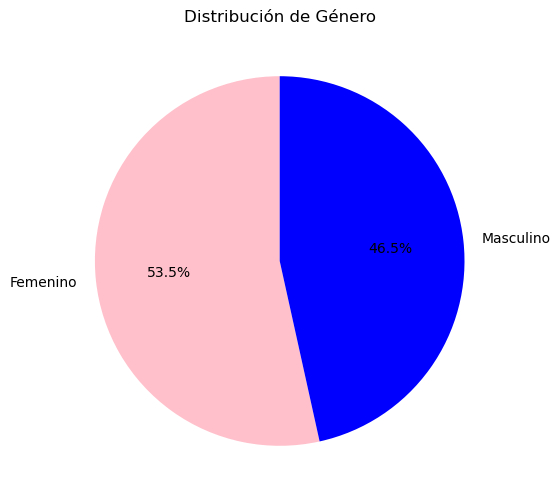

In [7]:
# Crear un gráfico de pastel 
plt.figure(figsize=(6, 6))
plt.pie(conteo_sexo, labels=['Femenino', 'Masculino'], autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])
plt.title('Distribución de Género')
plt.show()

## Casos por sexo

- Femenino       3.414.880
- Masculino      2.972.265

In [8]:
df["Edad"].mode()

0    30
Name: Edad, dtype: int64

### Edad mas comun

Edad mas comun es 30

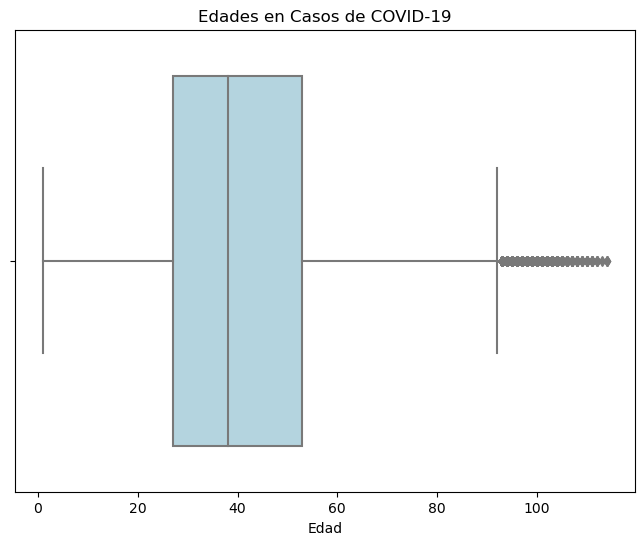

In [9]:
# Crear un boxplot de la columna "Edad"
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Edad"], color='lightblue')
plt.title('Edades en Casos de COVID-19')
plt.xlabel('Edad')
plt.show()

### Distribucion de los casos por edad

- La mayoría de las edades se concentran en el rango intercuartílico entre 27 y 53.
- Hay algunos datos atípicos mayores, indicados por puntos fuera del bigote superior, que sugieren la presencia de edades    considerablemente más altas que la mediana y el rango intercuartílico.
- El bigote inferior es corto, indicando que no hay datos atípicos menores significativos.

In [10]:
df["Recuperado"].value_counts()

Recuperado    6206755
Fallecido      142815
Activo           1020
fallecido         295
Name: Recuperado, dtype: int64

In [11]:
# se remplaza los facellidos con Fallecidos
df['Recuperado'].replace('fallecido', 'Fallecido', inplace=True)

In [12]:
df["Recuperado"].value_counts()

Recuperado    6206755
Fallecido      143110
Activo           1020
Name: Recuperado, dtype: int64

## Casos activos

    1020

## Recuperados

    - Recuperado    6.206.755
    - Fallecido      143.110

In [13]:
# Convertir las columnas de fechas a datetime
columnas_fecha = ['fecha reporte web', 'Fecha de notificación', 'Fecha de inicio de síntomas', 
                   'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación']

for columna in columnas_fecha:
    df[columna] = pd.to_datetime(df[columna], errors='coerce')

# Encuentra la fecha mínima y máxima en el conjunto de datos
fecha_minima = df[columnas_fecha].min().min()
fecha_maxima = df[columnas_fecha].max().max()

print(fecha_minima, " hasta ", fecha_maxima)

2020-02-27 00:00:00  hasta  2023-12-27 00:00:00


## Rango de fechas en el conjunto de datos

El rango de fechas en el conjunto de datos es desde 2020-02-27 hasta 2023-12-27

In [14]:
# renombrar columnas
df = df.rename(columns={"Nombre departamento":"Departamento"})
df = df.rename(columns={"Nombre municipio":"Municipio"})

In [15]:
# se remplaza BOGOTA con CUNDINAMARCA
df['Departamento'].replace('BOGOTA', 'CUNDINAMARCA', inplace=True)

In [16]:
df_dep = df["Departamento"].value_counts().head(10)
df_mun = df["Municipio"].value_counts().head(10)

In [17]:
print(df_dep)

CUNDINAMARCA       2218006
ANTIOQUIA           954904
VALLE               572011
SANTANDER           297152
BARRANQUILLA        277937
CARTAGENA           163489
ATLANTICO           141048
BOYACA              130973
TOLIMA              127712
NORTE SANTANDER     125984
Name: Departamento, dtype: int64


In [18]:
print(df_mun)

BOGOTA          1886829
MEDELLIN         550551
CALI             406145
BARRANQUILLA     277937
CARTAGENA        163489
BUCARAMANGA      142741
IBAGUE            91553
SANTA MARTA       84814
MANIZALES         84450
CUCUTA            77347
Name: Municipio, dtype: int64


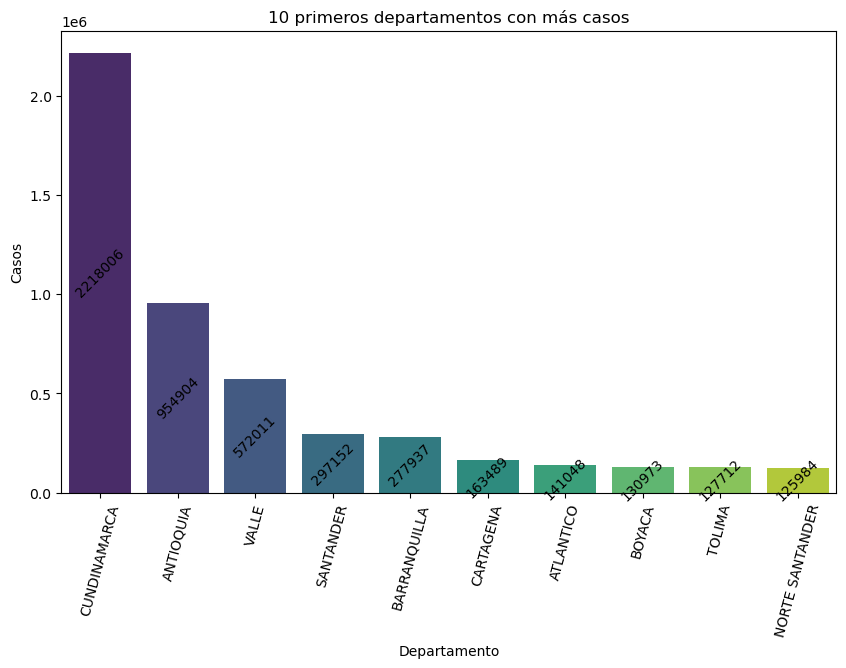

In [19]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_dep.index, y=df_dep.values, palette='viridis')
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.title("10 primeros departamentos con más casos")
plt.xlabel("Departamento")
plt.ylabel("Casos")
plt.show()

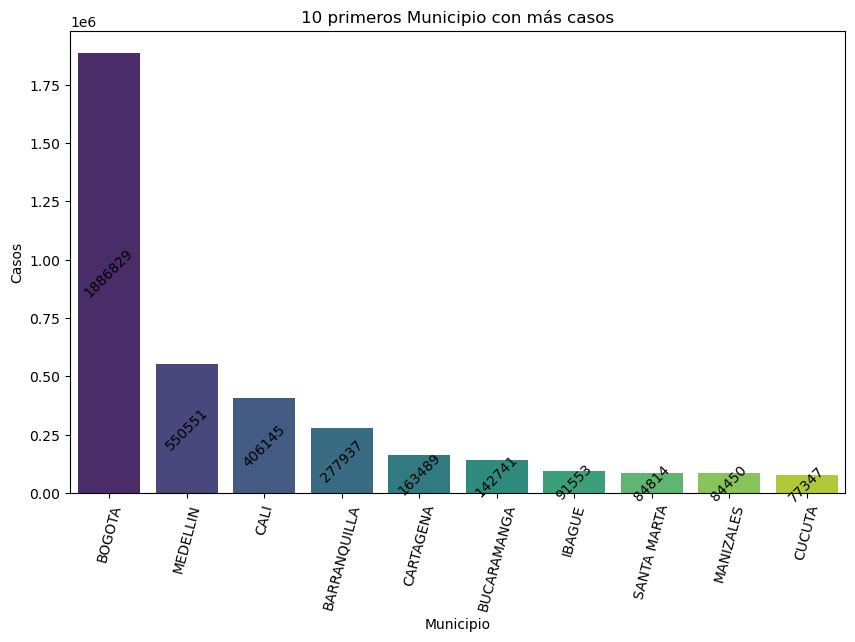

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_mun.index, y=df_mun.values, palette='viridis')
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.title("10 primeros Municipio con más casos")
plt.xlabel("Municipio")
plt.ylabel("Casos")
plt.show()

## Casos por departamento y municipio

### Top 10 Departamentos

    - CUNFINAMARCA    1.886.829
    - ANTIOQUIA        954.904
    - VALLE            572.011
    - CUNDINAMARCA     331.177
    - SANTANDER        297.152
    - BARRANQUILLA     277.937
    - CARTAGENA        163.489
    - ATLANTICO        141.048
    - BOYACA           130.973
    - TOLIMA           127.712
    
### Top 10 Municipios

    - BOGOTA          1.886.829
    - MEDELLIN         550.551
    - CALI             406.145
    - BARRANQUILLA     277.937
    - CARTAGENA        163.489
    - BUCARAMANGA      142.741
    - IBAGUE            91.553
    - SANTA MARTA       84.814
    - MANIZALES         84.450
    - CUCUTA            77.347

In [21]:
df["Recuperado"].value_counts()

Recuperado    6206755
Fallecido      143110
Activo           1020
Name: Recuperado, dtype: int64

In [22]:
print(df.groupby("Recuperado"))

In [23]:
round(df["Recuperado"].value_counts().describe(),2)

count          3.00
mean     2116961.67
std      3542577.38
min         1020.00
25%        72065.00
50%       143110.00
75%      3174932.50
max      6206755.00
Name: Recuperado, dtype: float64

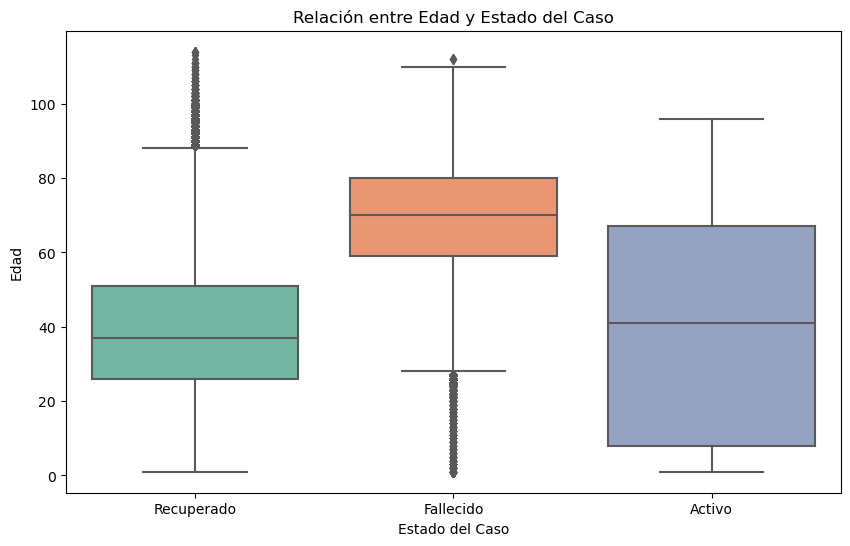

In [24]:
# Comparar la distribución de edades por estado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recuperado', y='Edad', data=df, palette='Set2')
plt.title('Relación entre Edad y Estado del Caso')
plt.xlabel('Estado del Caso')
plt.ylabel('Edad')
plt.show()

## Relación entre la edad y el estado del caso

- Recuperacion: Las personas entre 23 y 50 años, son la personas que mas se han recuperado. Tienen mas posibilidades de recuperarsen las personas menores a 50 años, y dificilmente las personas mayores a 90 años se recuperen.
- Fallecidos: Las personas que mas fallecieron se encuentran entre los 60 y 80 años. las posibilidades de fallecer aumentan cuando tienen mas de 60 años y se evidencian menores casos  fallecidos en niños.

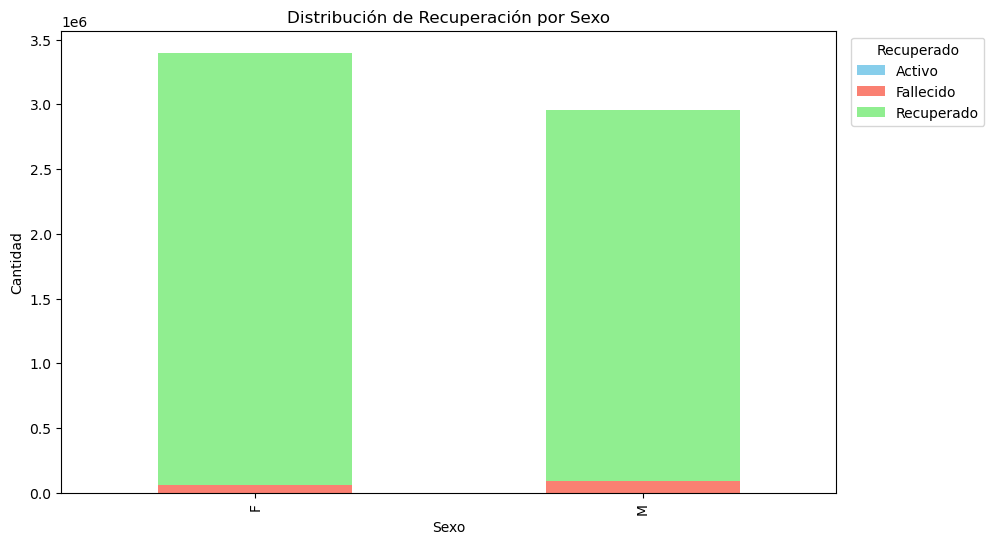

In [25]:
# Frecuencia de combinaciones de Sexo y Recuperado
df_agregado = df.groupby(['Sexo', 'Recuperado']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
df_agregado.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'], figsize=(10, 6))
plt.title('Distribución de Recuperación por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Recuperado', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

## Relación entre el sexo y el estado del caso

No se evidencia una relacion significativa.

In [26]:
# Calcular la diferencia de tiempo entre notificación y diagnóstico
df['Tiempo hasta diagnóstico'] = df['Fecha de diagnóstico'] - df['Fecha de notificación']

# Calcular la media y mediana
media_tiempo = df['Tiempo hasta diagnóstico'].mean()
mediana_tiempo = df['Tiempo hasta diagnóstico'].median()

print(f"Tiempo promedio hasta diagnóstico: {media_tiempo}")
print(f"Mediana del tiempo hasta diagnóstico: {mediana_tiempo}")

Tiempo promedio hasta diagnóstico: 4 days 01:39:34.065118359
Mediana del tiempo hasta diagnóstico: 2 days 00:00:00


## Tiempo de notificacion hasta el diagnostico

La mediana de 2 días sugiere que la mitad de las observaciones tienen un tiempo hasta el diagnóstico de 2 días o menos

In [31]:
# Calcular el tiempo hasta recuperación y el tiempo hasta muerte
df['Tiempo hasta recuperación'] = df['Fecha de recuperación'] - df['Fecha de inicio de síntomas']
df['Tiempo hasta muerte'] = df['Fecha de muerte'] - df['Fecha de inicio de síntomas']

In [28]:
# Convertir las columnas de tiempo a tipo timedelta
df['Tiempo hasta recuperación'] = pd.to_timedelta(df['Tiempo hasta recuperación'])
df['Tiempo hasta muerte'] = pd.to_timedelta(df['Tiempo hasta muerte'])

In [29]:
# Calcular estadísticas descriptivas
estadisticas_recuperacion = df['Tiempo hasta recuperación'].describe()
estadisticas_muerte = df['Tiempo hasta muerte'].describe()

In [30]:
# Imprimir estadísticas descriptivas
print("Estadísticas para Tiempo hasta Recuperación:")
print(estadisticas_recuperacion)

print("\nEstadísticas para Tiempo hasta Muerte:")
print(estadisticas_muerte)

Estadísticas para Tiempo hasta Recuperación:
count                       5702491
mean     22 days 23:11:20.713253209
std      26 days 06:41:26.582100067
min                 0 days 00:00:00
25%                14 days 00:00:00
50%                17 days 00:00:00
75%                21 days 00:00:00
max               437 days 00:00:00
Name: Tiempo hasta recuperación, dtype: object

Estadísticas para Tiempo hasta Muerte:
count                        183288
mean     44 days 17:13:24.661516301
std      75 days 00:05:55.296042094
min                 0 days 00:00:00
25%                12 days 00:00:00
50%                20 days 00:00:00
75%                34 days 00:00:00
max               553 days 00:00:00
Name: Tiempo hasta muerte, dtype: object


## Cuánto tiempo tardan los casos en recuperarse o fallecer después de el inicio de síntomas

- El tiempo promedio hasta la recuperación es de aproximadamente 22 días
- El tiempo promedio hasta la muerte es de aproximadamente 44 días